## Importing all necessary Libraries

In [131]:
!pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


In [132]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization and plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import datetime as dt
from datetime import datetime

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


## Data preparation & preprocessing.

In [2]:
df = pd.read_csv("bank_data_C.csv")


In [3]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.describe(include = "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [5]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


## Convert data types to the correct format

In [7]:
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], dayfirst=True)
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], dayfirst=True)

In [8]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [10]:
df["TransactionDate"].unique()

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [11]:
df["CustomerDOB"].unique()

array(['1994-01-10T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
def calculate_age(df):
    # Subtract year of birth from transaction year
    df["Age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
    return df

In [13]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Observe and correct customer with negative age values

In [14]:
df[df["Age"] <= 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-10-08
15        2068-07-10
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-10-05
1041591   2071-10-05
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [15]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

In [16]:
df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)

In [17]:
df = calculate_age(df)
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


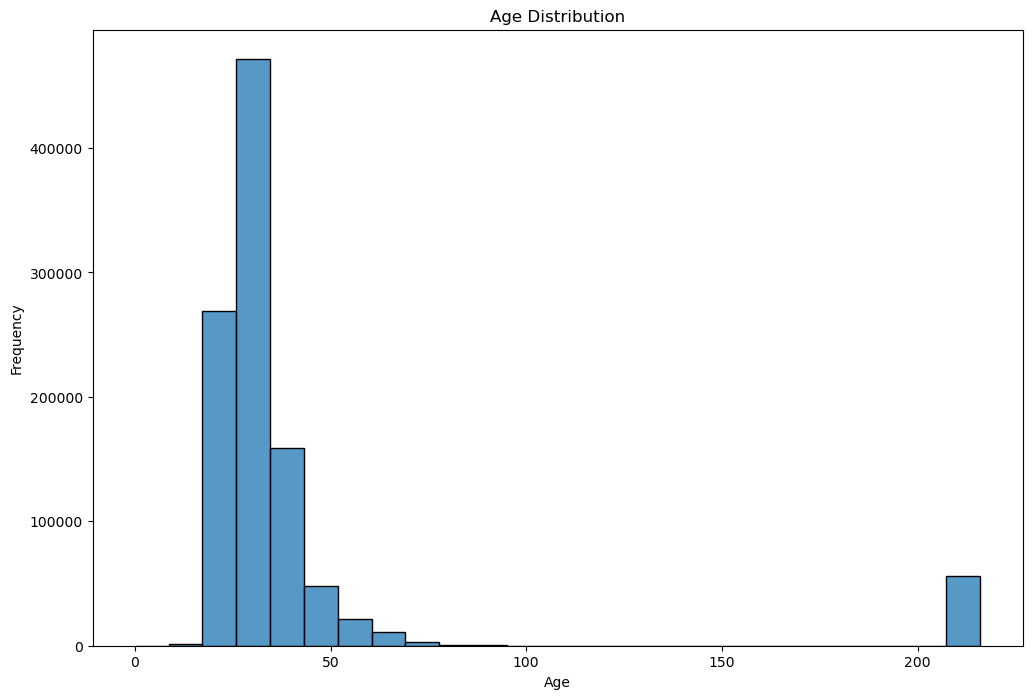

In [18]:
# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df["Age"], bins=25, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

In [19]:
df[df["Age"] > 100]["CustomerDOB"]

16        1800-01-01
22        1800-01-01
28        1800-01-01
34        1800-01-01
150       1800-01-01
             ...    
1041491   1800-01-01
1041500   1800-01-01
1041578   1800-01-01
1041580   1800-01-01
1041587   1800-01-01
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [20]:
df[df["Age"] > 100]["CustomerDOB"].unique()

array(['1800-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
def replace_age_outlier(df):
    DOB_threshold = 1900

    # Find rows where year of birth is less than the threshold
    age_outliers = df[df["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the mean of valid DOBs
    mean_DOB = df.loc[~df.index.isin(age_outliers), "CustomerDOB"].mean()

    # Replace outlier DOBs with the mean DOB
    df.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return df

In [22]:
# Fix any age outliers
df = replace_age_outlier(df)

# Recalculate age after fixing DOBs
df = calculate_age(df)

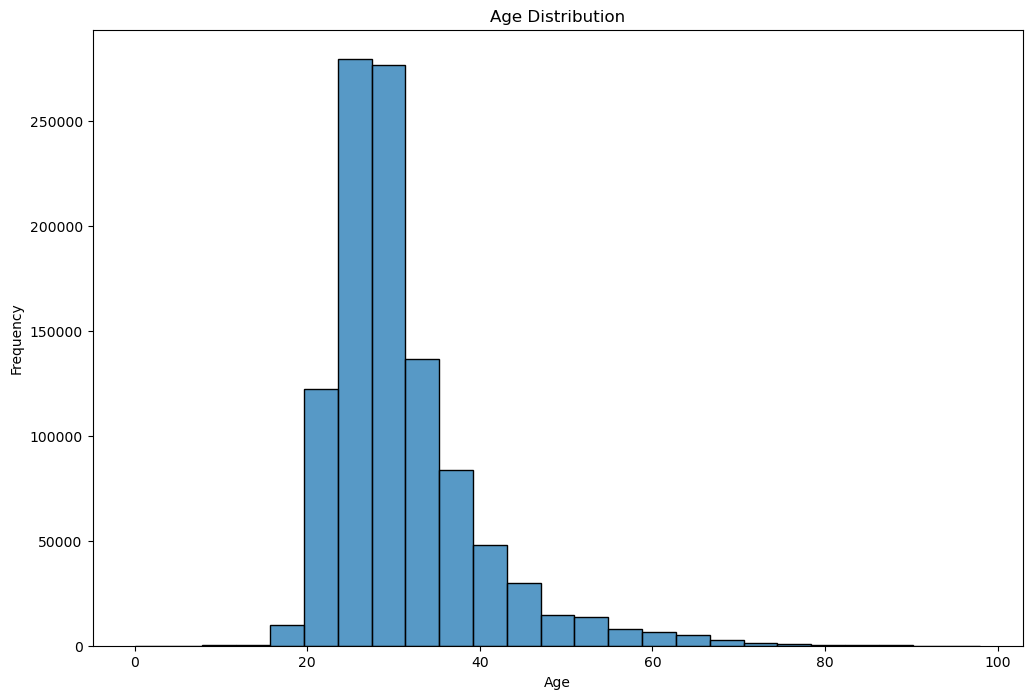

In [23]:
# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df["Age"], bins=25, kde=False)
plt.xlabel("Age")           
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()


## Gender

In [24]:
df["CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [25]:
df["CustGender"] = df["CustGender"].replace('T','M')

In [26]:
df["CustGender"].value_counts()

M    760979
F    280635
Name: CustGender, dtype: int64

## Location

In [27]:
df["CustLocation"].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

## Account Balance

In [28]:
df["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

## Transaction Amount

In [29]:
df["TransactionAmount (INR)"].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [30]:
(df["TransactionAmount (INR)"] == 0).sum()


820

In [31]:
df.drop(df[df["TransactionAmount (INR)"] == 0].index, axis=0, inplace=True)

In [32]:
(df["TransactionAmount (INR)"] == 0).sum()

0

In [33]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Exploratory Data Analysis

## Date

In [34]:
df["CustomerID"].unique()

array(['C5841053', 'C2142763', 'C4417068', ..., 'C8020229', 'C6459278',
       'C6420483'], dtype=object)

In [35]:
df.shape

(1040794, 10)

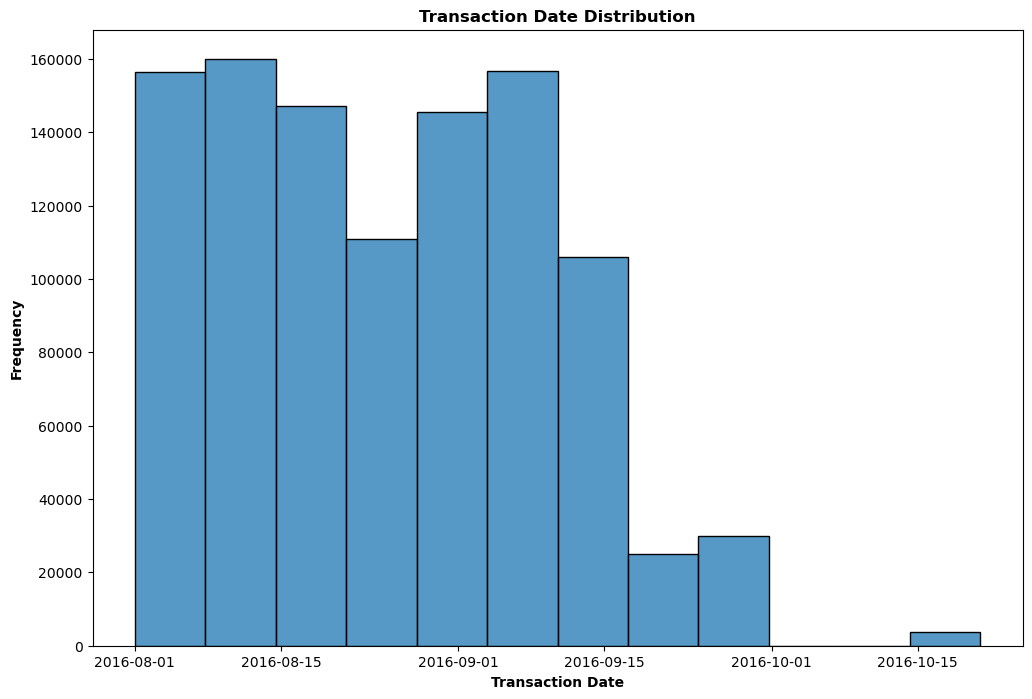

In [36]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(df["TransactionDate"], bins=12, kde = False)
plt.xlabel("Transaction Date", fontweight ='bold')           
plt.ylabel("Frequency", fontweight ='bold')     
plt.title("Transaction Date Distribution", fontweight ='bold')
plt.show()

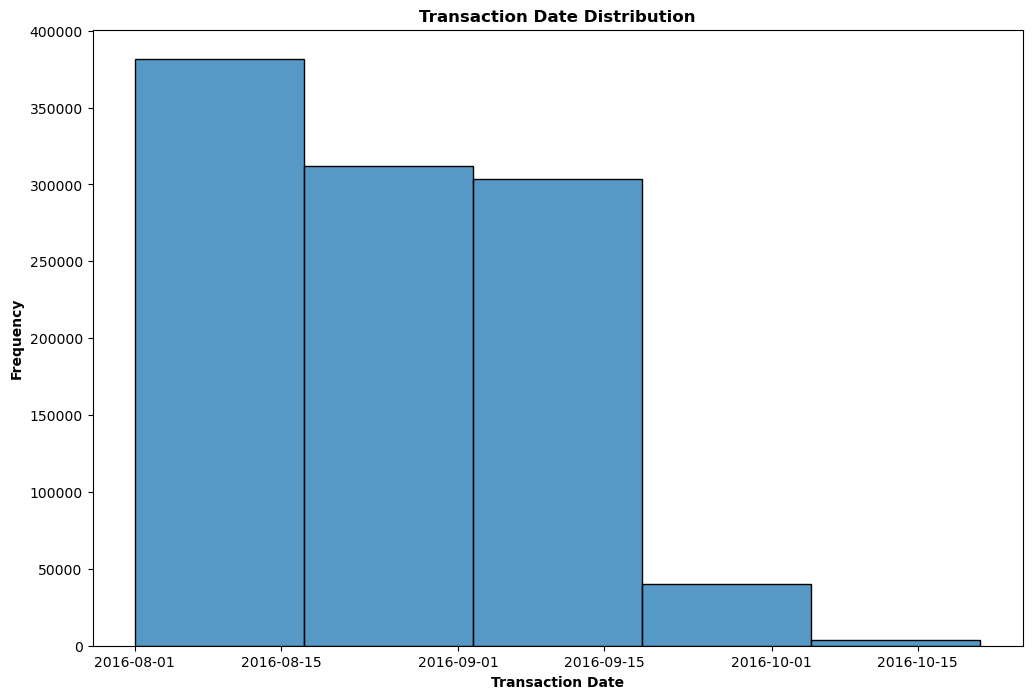

In [37]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(df["TransactionDate"], bins=5, kde = False)
plt.xlabel("Transaction Date", fontweight ='bold')           
plt.ylabel("Frequency", fontweight ='bold')     
plt.title("Transaction Date Distribution", fontweight ='bold')
plt.show()

## Gender

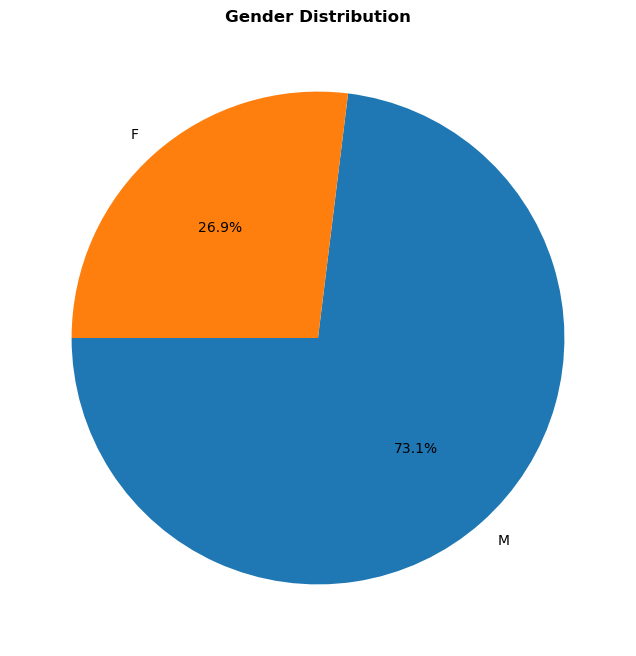

In [38]:
gender_count = df['CustGender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution", fontweight ='bold')
plt.ylabel('')  # Optional: removes the default y-axis label
plt.show()

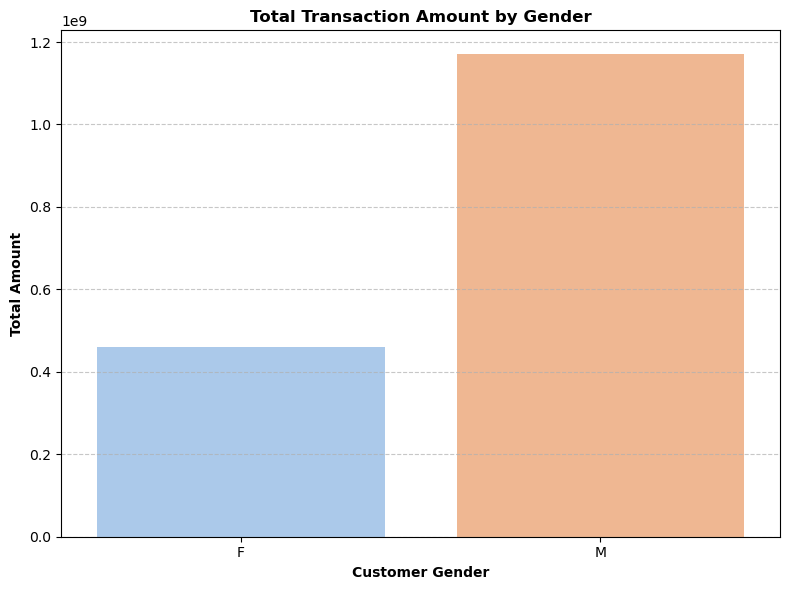

In [39]:
customer_sales = df.groupby('CustGender')['TransactionAmount (INR)'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=customer_sales, x='CustGender', y='TransactionAmount (INR)', palette='pastel')
plt.title('Total Transaction Amount by Gender', fontweight = 'bold')
plt.xlabel('Customer Gender', fontweight = 'bold')
plt.ylabel('Total Amount', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


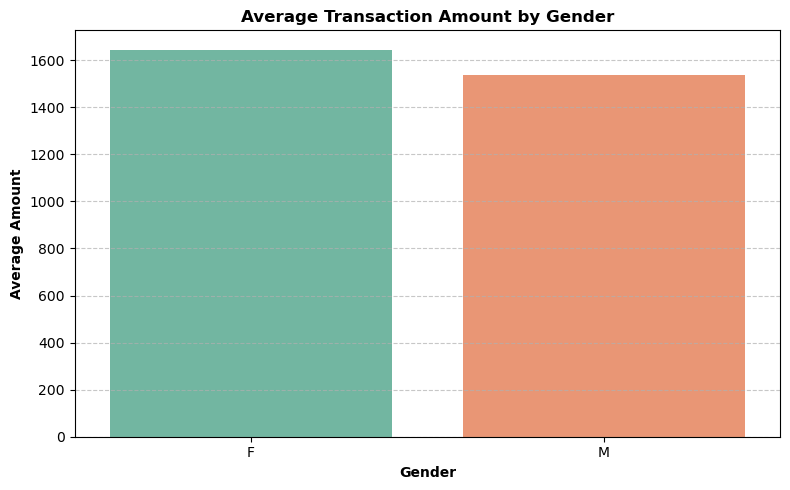

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df.groupby('CustGender')['TransactionAmount (INR)'].mean().reset_index(),
    x='CustGender',
    y='TransactionAmount (INR)',
    palette='Set2'
)
plt.title("Average Transaction Amount by Gender", fontweight ='bold')
plt.xlabel("Gender", fontweight ='bold')
plt.ylabel("Average Amount", fontweight ='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Age

In [41]:
df['Age'].unique()

array([22, 59, 20, 43, 28, 44, 24, 34, 32, 38, 48, 31, 27, 25, 23, 30, 49,
       37, 39, 19, 33, 26, 36, 35, 50, 29, 41, 21, 42, 45, 84, 57, 17, 51,
       75, 62, 46, 40, 95, 47, 12, 73, 18, 65, 56, 60, 63, 69, 16, 52, 68,
       54, 64, 61, 55, 80, 53, 74, 72, 78, 67, 58, 66, 70, 14, 71, 79,  9,
       15, 77, 76,  3, 13, 11,  6,  5, 83, 82, 89, 97, 88, 86,  7, 85, 87,
       81,  1,  0, 10,  8,  4, 93, 90, 92, 94,  2, 96, 91, 98],
      dtype=int64)

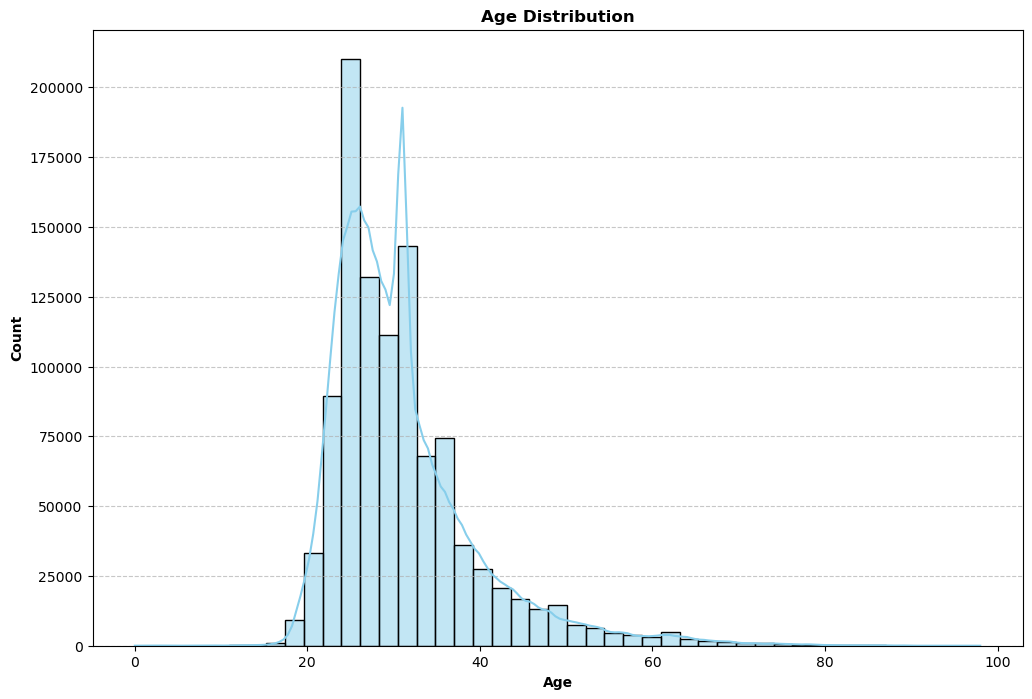

In [42]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=45, kde=True, color='skyblue')
plt.title('Age Distribution', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

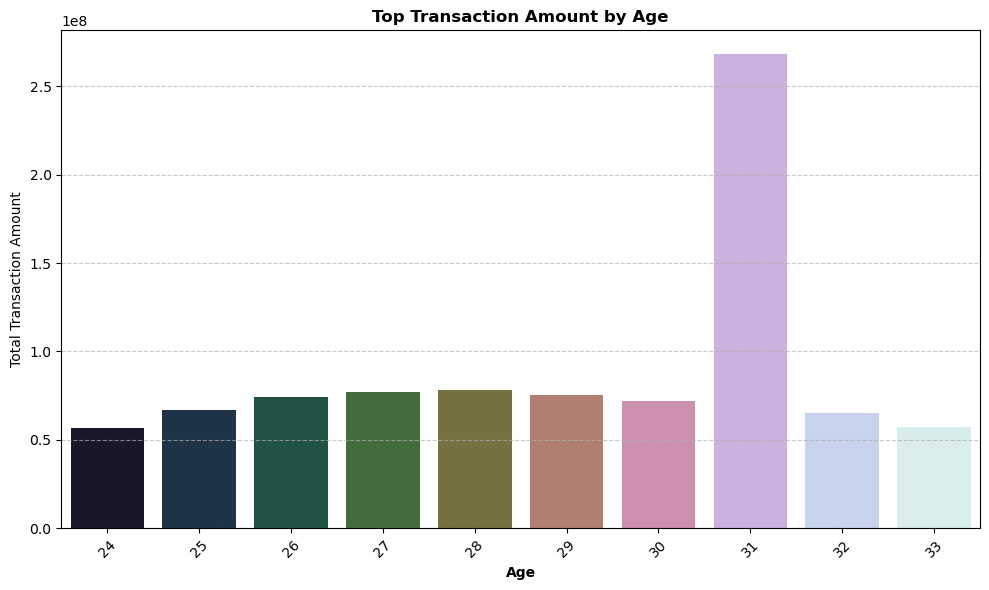

In [43]:
customer_sales = df.groupby('Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_sales, x='Age', y='TransactionAmount (INR)', palette='cubehelix')
plt.title('Top Transaction Amount by Age', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

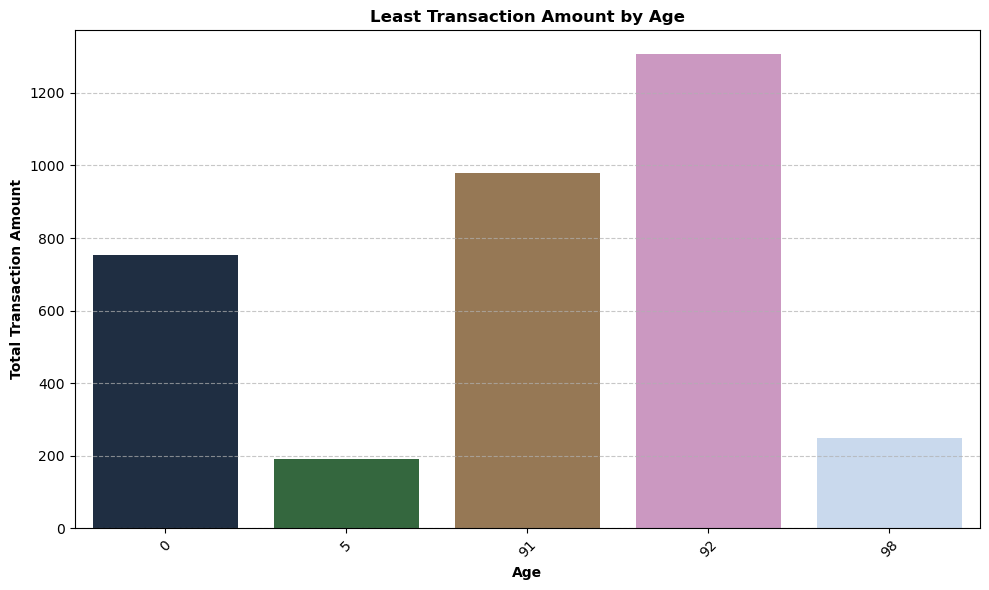

In [44]:
customer_sales = df.groupby('Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False).tail(5).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_sales, x='Age', y='TransactionAmount (INR)', palette='cubehelix')
plt.title('Least Transaction Amount by Age', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Total Transaction Amount', fontweight = 'bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Location

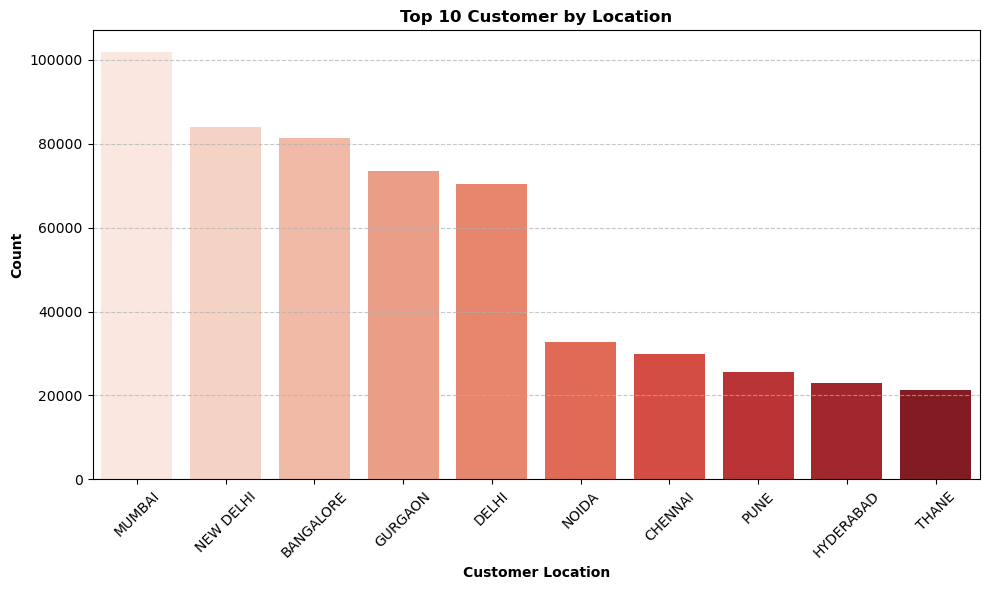

In [45]:
location_count = df['CustLocation'].value_counts().reset_index()
location_count.columns = ['CustLocation', 'Count']

# Filter to only include top N locations (i.e, top 10 locations)
top_n = 10
top_location_count = location_count.head(top_n)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='CustLocation', y='Count', data=top_location_count, palette='Reds')

# Add labels and title
plt.title(f"Top {top_n} Customer by Location", fontweight ='bold')
plt.xlabel("Customer Location", fontweight ='bold')
plt.ylabel("Count", fontweight ='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Transaction

In [46]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20


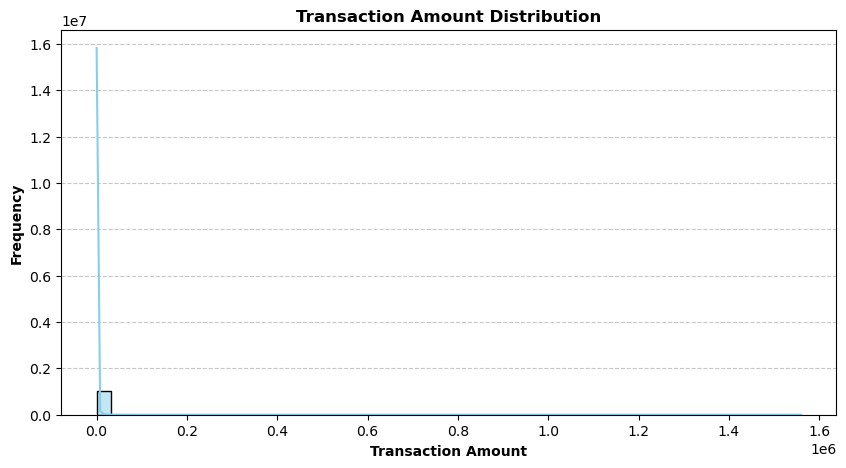

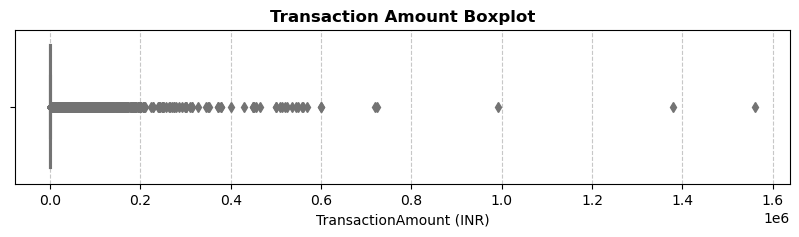

In [47]:

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionAmount (INR)'], bins=50, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution', fontweight ='bold')
plt.xlabel('Transaction Amount', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TransactionAmount (INR)'], color='lightgreen')
plt.title('Transaction Amount Boxplot', fontweight = 'bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


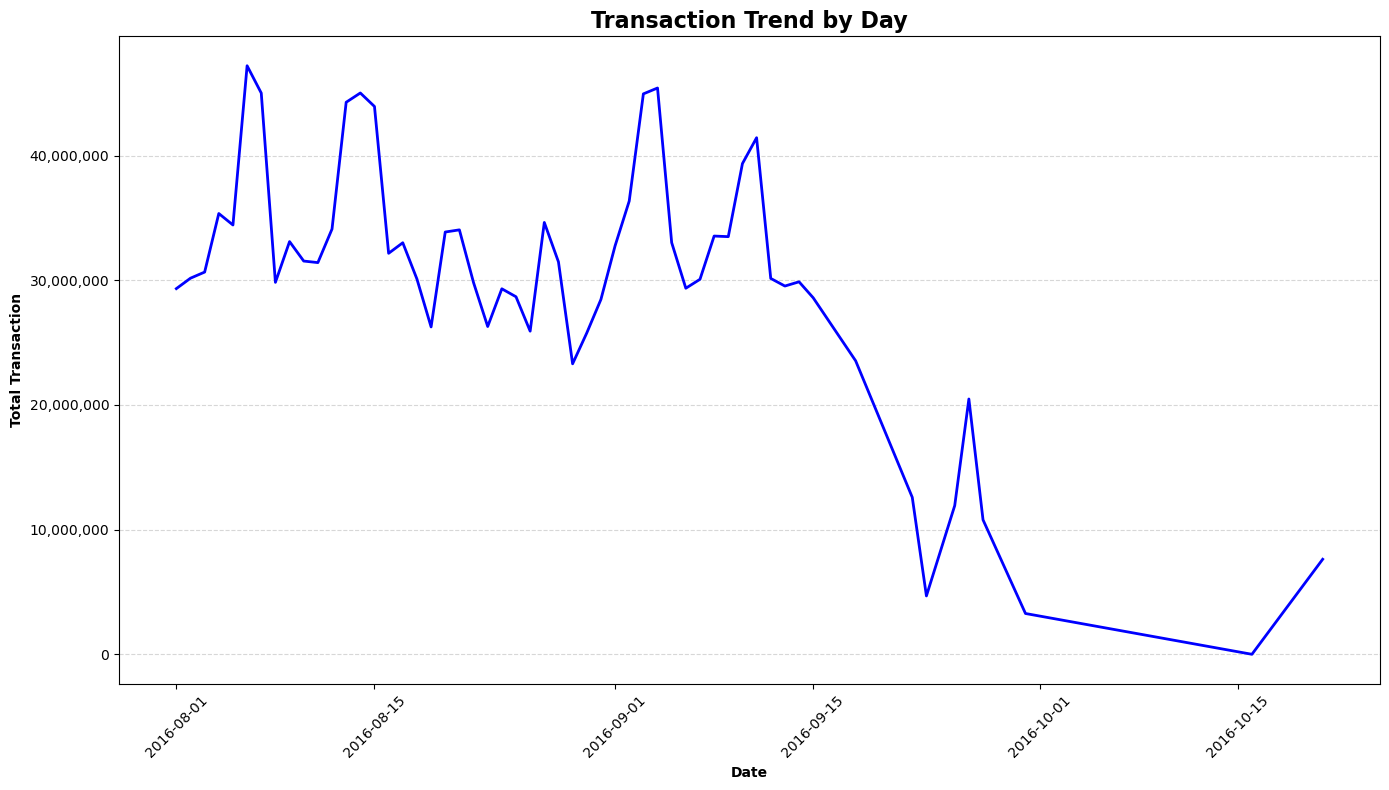

In [48]:

def format_with_commas(x, _):
    return f'{x:,.0f}'

daily_sales = df.groupby('TransactionDate')['TransactionAmount (INR)'].sum().reset_index()


# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=daily_sales,
    x='TransactionDate',
    y='TransactionAmount (INR)',
    color='Blue',
    linewidth=2
)

# Titles and labels
plt.title("Transaction Trend by Day", fontsize=16, fontweight ='bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Total Transaction", fontweight ='bold')

# Improve x-axis label readability
plt.xticks(rotation=45)

# Add grid and layout tweaks
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))  # Apply comma format
plt.tight_layout()
plt.show()


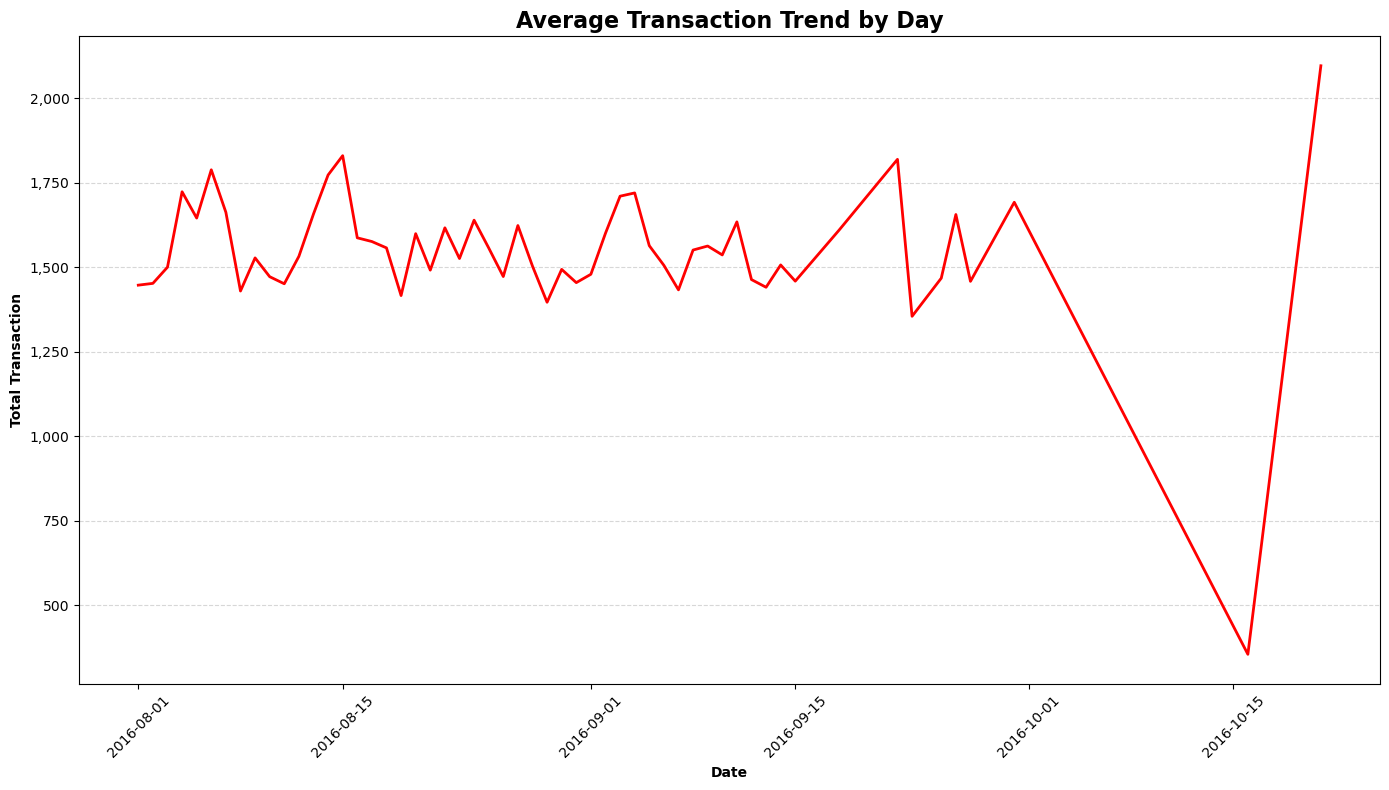

In [49]:
daily_sales = df.groupby('TransactionDate')['TransactionAmount (INR)'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=daily_sales,
    x='TransactionDate',
    y='TransactionAmount (INR)',
    color='red',
    linewidth=2
)

# Titles and labels
plt.title("Average Transaction Trend by Day", fontsize=16, fontweight ='bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Total Transaction", fontweight ='bold')

# Improve x-axis label readability
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas)) #apply comma
#Add grid and layout tweaks
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

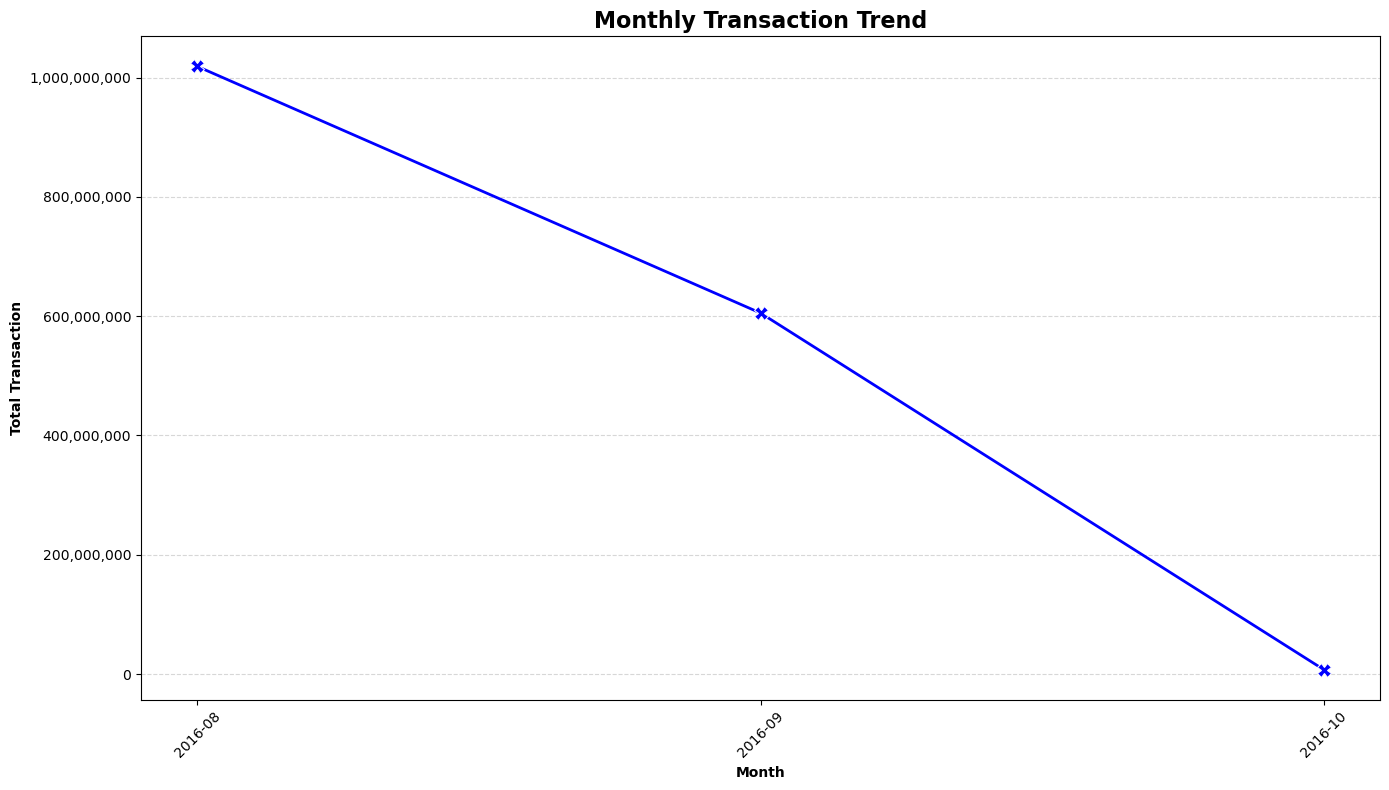

In [50]:
# Format y-axis with commas
def format_with_commas(x, _):
    return f'{x:,.0f}'

# Ensure 'TransactionDate' is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Create 'YearMonth' column for grouping
df['YearMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)

# Group by 'YearMonth'
monthly_sales = df.groupby('YearMonth')['TransactionAmount (INR)'].sum().reset_index()

# Plot with markers
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales,
    x='YearMonth',
    y='TransactionAmount (INR)',
    color='blue',
    linewidth=2,
    marker='X',# Add marker here
    markersize=10 
)

plt.title("Monthly Transaction Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Total Transaction", fontweight='bold')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.tight_layout()
plt.show()


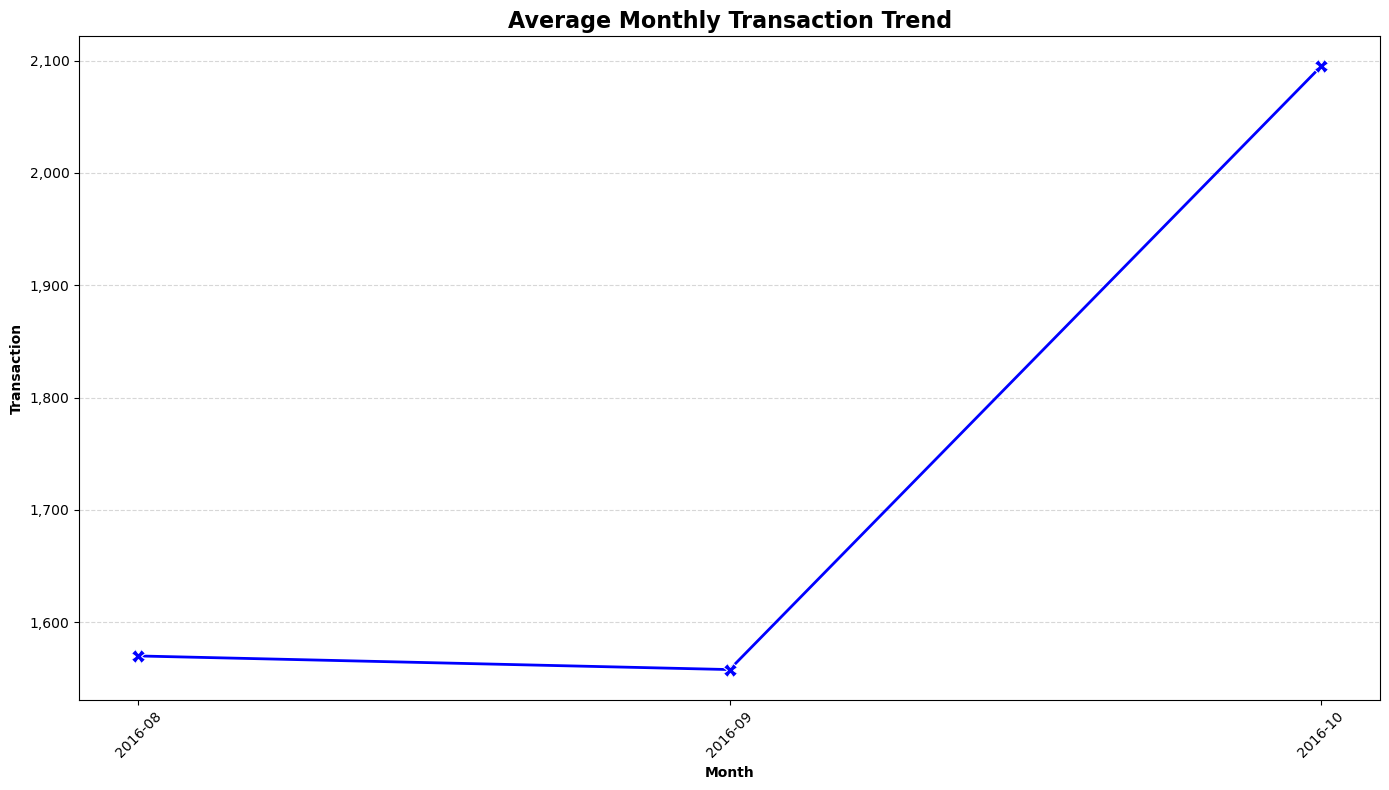

In [51]:
# Format y-axis with commas
def format_with_commas(x, _):
    return f'{x:,.0f}'

# Ensure 'TransactionDate' is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Create 'YearMonth' column for grouping
df['YearMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)

# Group by 'YearMonth'
monthly_sales = df.groupby('YearMonth')['TransactionAmount (INR)'].mean().reset_index()

# Plot with markers
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales,
    x='YearMonth',
    y='TransactionAmount (INR)',
    color='red',
    linewidth=2,
    marker='X',# Add marker here
    markersize=10 
)

plt.title("Average Monthly Transaction Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Transaction", fontweight='bold')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.tight_layout()
plt.show()

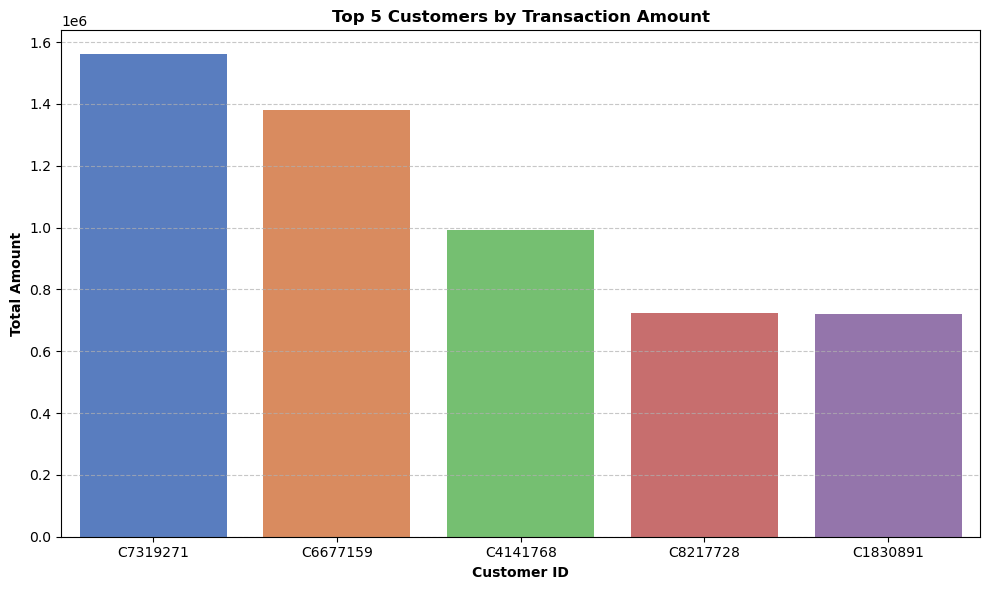

In [52]:
top_customers = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CustomerID', y='TransactionAmount (INR)', palette='muted')
plt.title('Top 5 Customers by Transaction Amount', fontweight='bold')
plt.xlabel('Customer ID', fontweight='bold')
plt.ylabel('Total Amount', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 ## sns.barplot(data=customer_sales, x='CustGender', y='TransactionAmount (INR)', palette='pastel')


Seaborn Built-in Palettes:
'pastel' – soft, light colors

'deep' – default Seaborn colors

'muted' – toned-down shades

'bright' – vibrant and distinct

'dark' – rich, bold colors

'colorblind' – colorblind-safe palette

🔥 Some visually appealing ones:
'rocket' – deep red to light pink

'mako' – dark blue to light teal

'cubehelix' – perceptually uniform grayscale

'coolwarm' – blue to red gradient (for diverging values)

'flare', 'crest', 'twilight', 'ch:s*3,rot=-.5' – for creative gradients 




## RFM - Recency, Frequency, and Monetary value Analysis


## Recency

In [56]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,YearMonth
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,2016-08
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,2016-08
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,2016-08
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,2016-08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,2016-08


In [57]:
day = df["TransactionDate"].max()
day

Timestamp('2016-10-21 00:00:00')

In [90]:
# Define 'day' as today's date
day = datetime.now()

# Calculate Recency
recency = df.groupby("CustomerID").agg({
    "TransactionDate": lambda x: (day - x.max()).days + 1
})


In [60]:
recency.head()

,TransactionDate
CustomerID,
C1010011,3139
C1010012,3182
C1010014,3189
C1010018,3150
C1010024,3178


In [89]:
print(Recency.empty)

False


In [63]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors="coerce")

In [65]:
print(df["CustomerID"].nunique())

878763


In [66]:
print(recency)

            TransactionDate
CustomerID                 
C1010011               3139
C1010012               3182
C1010014               3189
C1010018               3150
C1010024               3178
...                     ...
C9099836               3189
C9099877               3150
C9099919               3178
C9099941               3168
C9099956               3140

[878763 rows x 1 columns]


## Frequency

In [91]:
frequency = df.groupby("CustomerID")["TransactionID"].count()

In [69]:
frequency.head()

CustomerID
C1010011    2
C1010012    1
C1010014    2
C1010018    1
C1010024    1
Name: TransactionDate, dtype: int64

## Monetary value

In [70]:
monetary = df.groupby("CustomerID")["TransactionAmount (INR)"].sum()

In [71]:
monetary.head()

CustomerID
C1010011    5106.0
C1010012    1499.0
C1010014    1455.0
C1010018      30.0
C1010024    5000.0
Name: TransactionAmount (INR), dtype: float64

## RFM Table

In [92]:
RFM_table = pd.concat([recency, frequency, monetary], axis=1)

In [93]:
RFM_table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,3139,2,5106.0
C1010012,3182,1,1499.0
C1010014,3189,2,1455.0
C1010018,3150,1,30.0
C1010024,3178,1,5000.0


In [96]:
RFM_table = RFM_table.rename(columns={
    "TransactionDate": "Recency", 
    "TransactionID": "Frequency", 
    "TransactionAmount (INR)": "Monetary"
})

In [97]:
RFM_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,3139,2,5106.0
C1010012,3182,1,1499.0
C1010014,3189,2,1455.0
C1010018,3150,1,30.0
C1010024,3178,1,5000.0


In [81]:
RFM_table.isnull().sum()

Recency     0
Recency     0
Monetary    0
dtype: int64

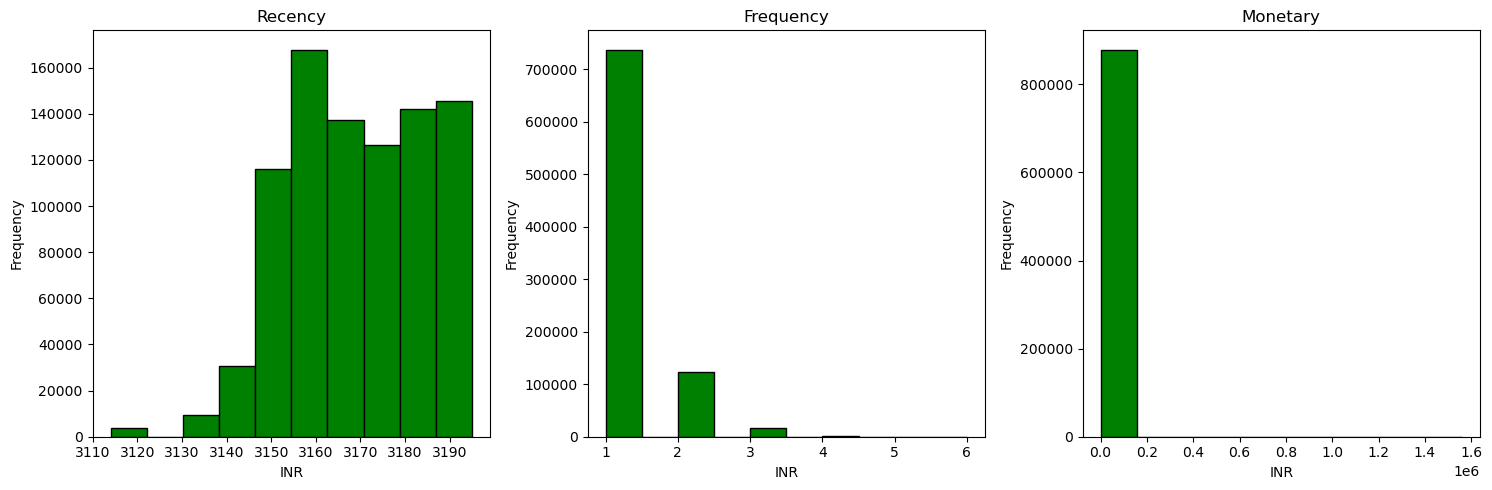

In [105]:
# Explore RFM Table
fig, axis = plt.subplots(1, 3, figsize=(15, 5))  # Corrected to `plt.subplots`
columns = ["Recency", "Frequency", "Monetary"]  # Ensure column names match RFM_table

for i, col in enumerate(columns):  # Use enumerate to loop through columns
    axis[i].hist(RFM_table[col], bins=10, color="green", edgecolor="black")  # Fix parameters
    axis[i].set_title(col.capitalize())  # Capitalize column name for title
    axis[i].set_xlabel("Days" if col == "recency" else "Count" if col == "frequency" else "INR")  # Conditional label
    axis[i].set_ylabel("Frequency")  # Set Y-axis label

plt.tight_layout()  # Corrected typo in layout function
plt.show()

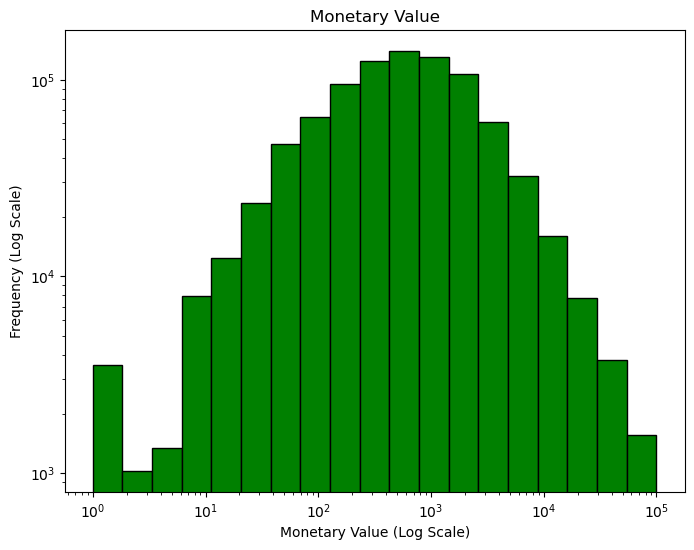

In [104]:
plt.figure(figsize=(8, 6))
plt.hist(RFM_table["Monetary"], bins=np.logspace(0, 5, 20), color="green", edgecolor="black")  # Fixed typos
plt.title("Monetary Value")
plt.xlabel("Monetary Value (Log Scale)")  # Fixed typo in xlabel
plt.ylabel("Frequency (Log Scale)")      # Fixed typo in ylabel
plt.xscale("log")
plt.yscale("log")
plt.show()

## Observe correlation

In [106]:
RFM_table.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.223293,-0.020675
Frequency,-0.223293,1.000000,0.097491
Monetary,-0.020675,0.097491,1.000000


# RFM score

In [107]:
RFM_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,3139,2,5106.0
C1010012,3182,1,1499.0
C1010014,3189,2,1455.0
C1010018,3150,1,30.0
C1010024,3178,1,5000.0


In [108]:
# Calculate quartiles for each RFM component
quartiles = RFM_table[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()

In [109]:
quartiles

{'Recency': {0.25: 3157.0, 0.5: 3169.0, 0.75: 3182.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [110]:
RFM_table["Frequency"].value_counts()

1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: Frequency, dtype: int64

In [111]:
def assign_R_score(x, feature):
    """this function is used to assign recency score
    the more recent a customer's latest transaction is, the higher the recency score"""

    if x <= quartiles[feature][0.25]:
        return 4
    elif x <= quartiles[feature][0.5]:
        return 3
    elif x <= quartiles[feature][0.75]:
        return 2
    else:
        return 1

def assign_M_score(x, feature):
    """This function is used for assigning monetary score.
    the higher the monetary value, the higher the monetary score"""

    if x <= quartiles[feature][0.25]:
        return 1
    elif x <= quartiles[feature][0.5]:
        return 2
    elif x <= quartiles[feature][0.75]:
        return 3
    else:
        return 4

In [112]:
def custom_frequency_score(x):
    """This function is used for assigning frequency score.
    frequency of 1,2 and 3 are assgned scores of 1,2 and 3 respectively
    and frequency of 4,5,and 6 are assigned scores of 4"""

    if x <= 3:
        return x
    else:
        return 4

In [113]:
# Assign quartile scores for recency
RFM_table['R_score'] = RFM_table['Recency'].apply(lambda x: assign_R_score(x, 'Recency'))

# Assign custom Frequency scores
RFM_table['F_score'] = RFM_table['Frequency'].apply(custom_frequency_score)

# Assign quartile scores for monetary component
RFM_table['M_score'] = RFM_table['Monetary'].apply(lambda x: assign_M_score(x, 'Monetary'))

In [114]:
# Calculate the RFM score by combining the three individual scores
RFM_table['RFM_group'] = RFM_table['R_score'].astype(str) + RFM_table['F_score'].astype(str) + RFM_table['M_score'].astype(str)

In [115]:
RFM_table.head(3)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group
CustomerID,,,,,,,
C1010011,3139,2,5106.0,4,2,4,424
C1010012,3182,1,1499.0,2,1,3,213
C1010014,3189,2,1455.0,1,2,3,123


In [116]:
RFM_table["RFM_score"] = RFM_table[['R_score', 'M_score', 'F_score']].sum(axis = 1)

In [117]:
RFM_table.head(3)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group,RFM_score
CustomerID,,,,,,,,
C1010011,3139,2,5106.0,4,2,4,424,10
C1010012,3182,1,1499.0,2,1,3,213,6
C1010014,3189,2,1455.0,1,2,3,123,6


<AxesSubplot:xlabel='RFM_score', ylabel='count'>

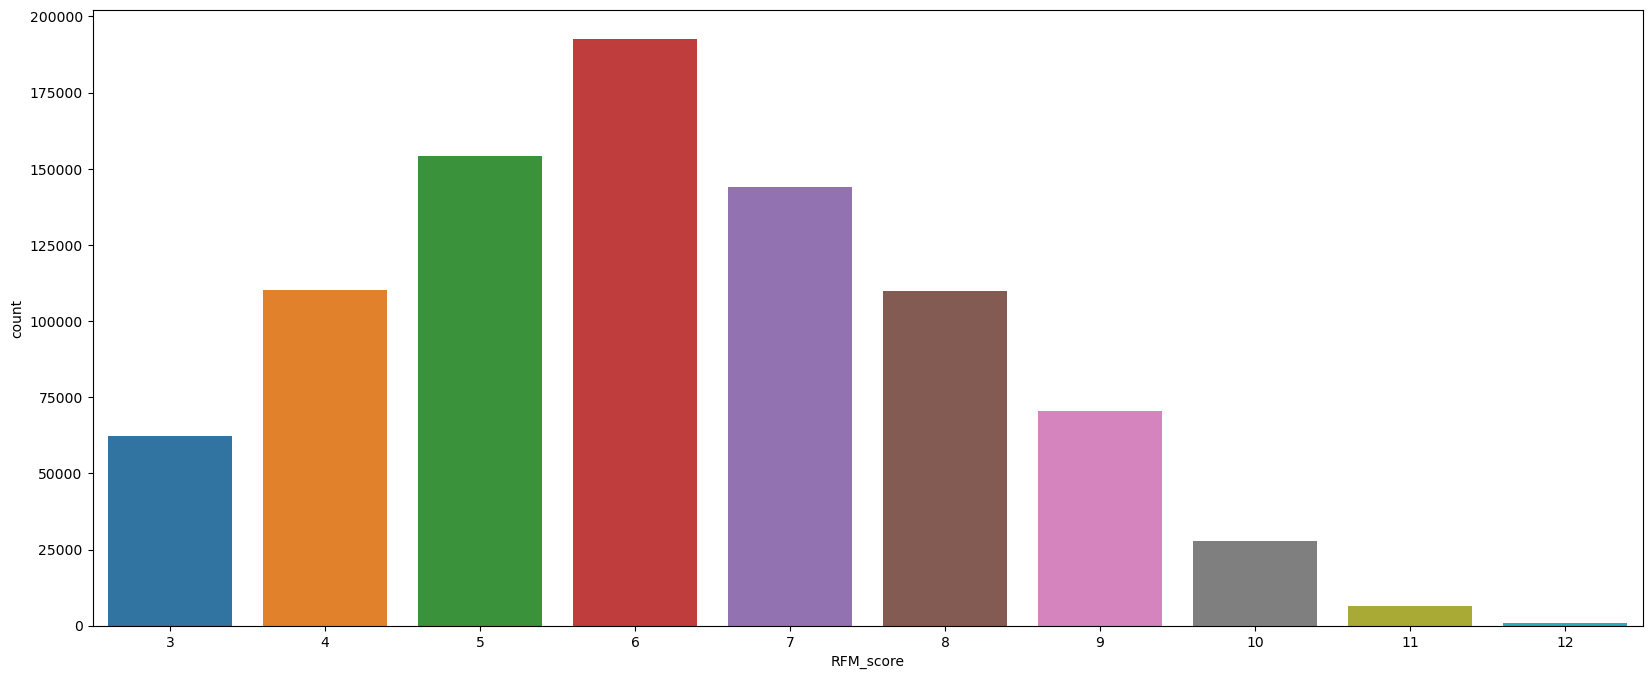

In [118]:
plt.figure(figsize = (20,8))
sns.countplot( x = RFM_table["RFM_score"])

In [119]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [120]:
RFM_table["segments"] = RFM_table["RFM_score"].apply(lambda x: assign_segments(x))

In [121]:
RFM_table.head(3)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group,RFM_score,segments
CustomerID,,,,,,,,,
C1010011,3139,2,5106.0,4,2,4,424,10,high
C1010012,3182,1,1499.0,2,1,3,213,6,medium
C1010014,3189,2,1455.0,1,2,3,123,6,medium


<AxesSubplot:xlabel='segments', ylabel='count'>

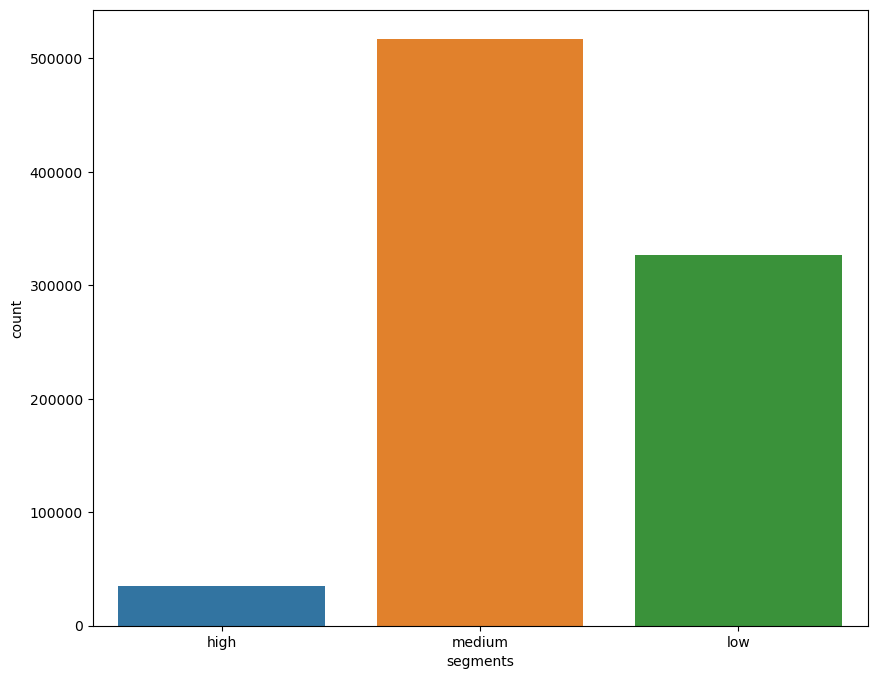

In [122]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["segments"])

In [124]:
RFM_table['weighted_score'] = (RFM_table['R_score'] * 2) + (RFM_table["F_score"] * 1) + (RFM_table['M_score'] * 1)
RFM_table.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group,RFM_score,segments,weighted_score
CustomerID,,,,,,,,,,
C1010011,3139,2,5106.0,4,2,4,424,10,high,14
C1010012,3182,1,1499.0,2,1,3,213,6,medium,8
C1010014,3189,2,1455.0,1,2,3,123,6,medium,7
C1010018,3150,1,30.0,4,1,1,411,6,medium,10
C1010024,3178,1,5000.0,2,1,4,214,7,medium,9


<AxesSubplot:xlabel='weighted_score', ylabel='count'>

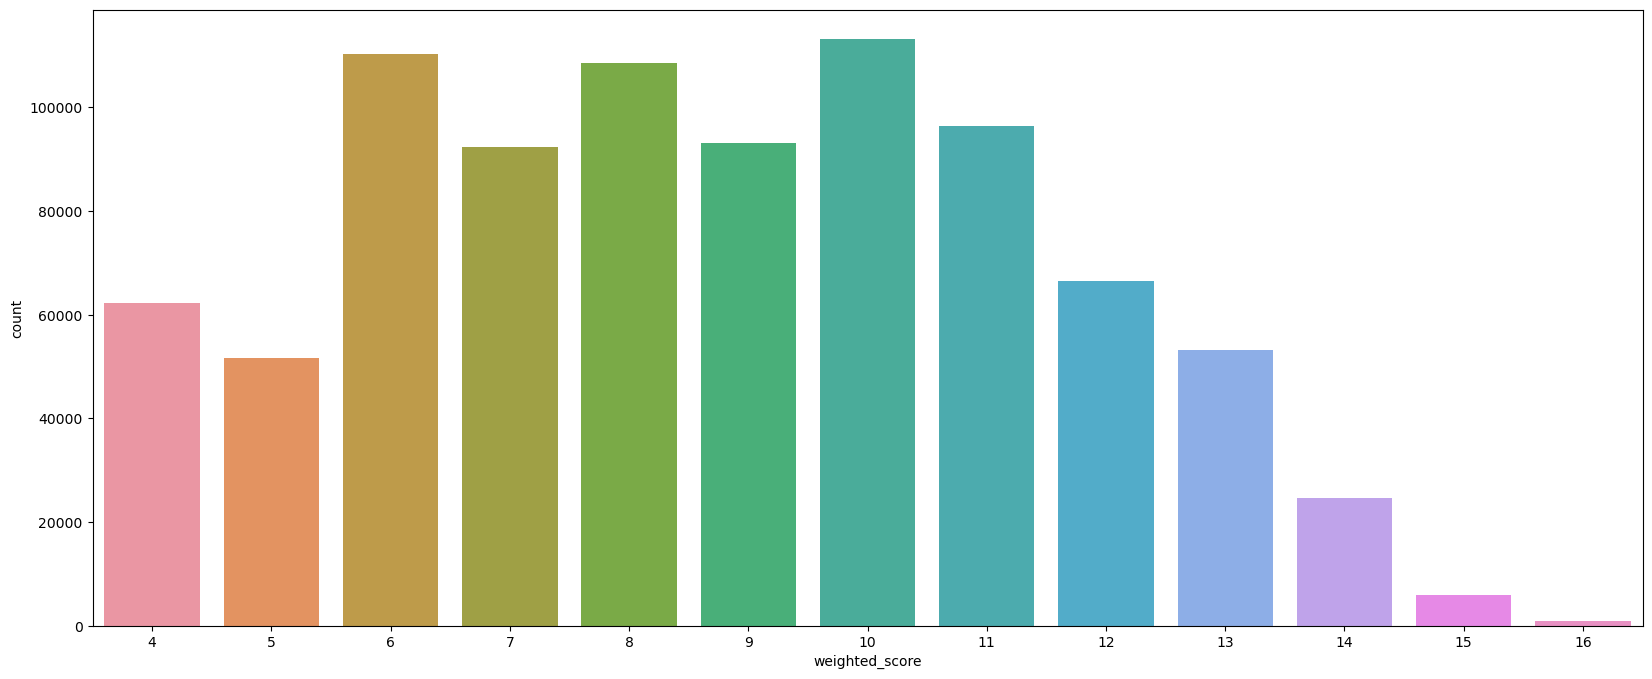

In [125]:
plt.figure(figsize = (20,8))
sns.countplot( x = RFM_table["weighted_score"])

In [126]:
RFM_table["weighted_segments"] = RFM_table["weighted_score"].apply(lambda x: assign_segments(x))

<AxesSubplot:xlabel='weighted_segments', ylabel='count'>

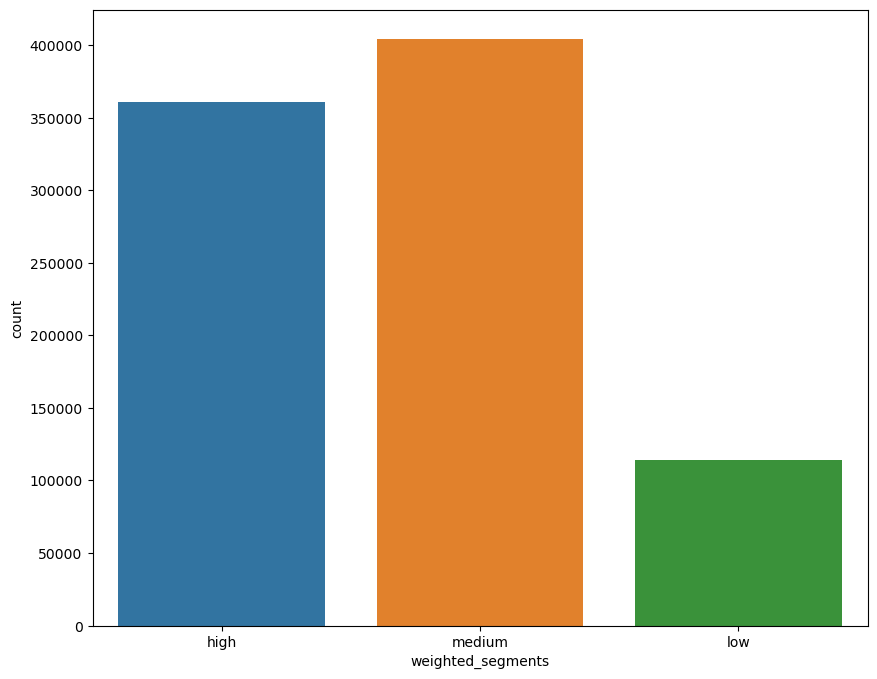

In [127]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["weighted_segments"])

## K-means Customer segmentation

In [128]:
RFM_data = RFM_table.drop(["RFM_group", "segments", "weighted_score", "weighted_segments"], axis = 1)
RFM_data.head(2)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
C1010011,3139,2,5106.0,4,2,4,10
C1010012,3182,1,1499.0,2,1,3,6


## Implement standard scaling

In [133]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_data)

In [134]:
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.82368347,
         1.34172808,  2.0708205 ],
       [ 0.83352617, -0.41084172, -0.04969314, ..., -0.41175149,
         0.45881674, -0.10052404],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  1.82368347,
         0.45881674, -0.10052404],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ..., -0.41175149,
        -1.30700594, -1.18619632],
       [-0.08588871, -0.41084172, -0.25120672, ..., -0.41175149,
        -1.30700594, -0.64336018],
       [-1.92471846, -0.41084172, -0.13925473, ..., -0.41175149,
         0.45881674,  0.98514823]])

## Implement clustering algorithm

In [135]:
model = KMeans(random_state = 1)

## using distortion metric

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10),
                 timings=False)

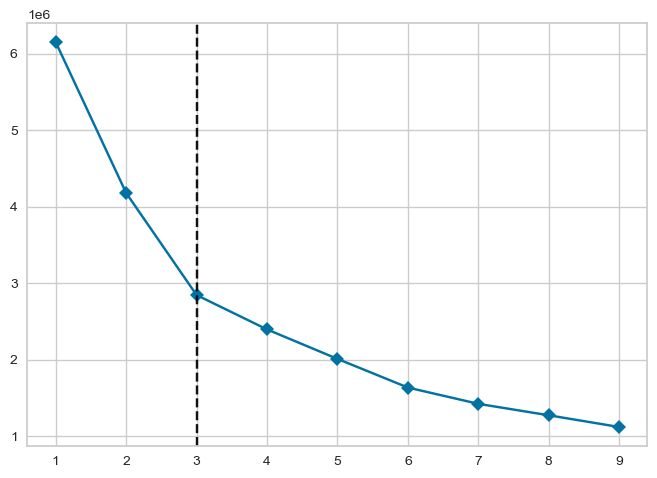

In [136]:
plot_model = KElbowVisualizer(model, k=(1,10), metric='distortion', timings=False)
plot_model.fit(scaled_data)

## Using calinski_harabasz metric

In [ ]:
plot_model_2 = KElbowVisualizer(model, k=(2,7), metric='calinski_harabasz', timings=False)
plot_model_2.fit(scaled_data)